# 911 Emergency Calls Data Analysis 

We will be analyzing some 911 call data from Kaggle(https://www.kaggle.com/mchirico/montcoalert). 

This data contains following fields:

1- lat : String variable, Latitude
2- lng: String variable, Longitude
3- desc: String variable, Description of the Emergency Call
4- zip: String variable, Zipcode
5- title: String variable, Title
6- timeStamp: String variable, YYYY-MM-DD HH:MM:SS
7- twp: String variable, Township
8- addr: String variable, Address
9- e: String variable, Dummy variable (always 1)



Data and Setup

** Import numpy and pandas **

In [2]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [7]:
df = pd.read_csv('911_calls.csv')

** Check the info() of this df **

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [9]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Top 5 zipcodes for 911 calls?

In [10]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 townships (twp) for 911 calls?

In [11]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Column  'title' is for the reasons of calls, how many unique title codes are there?

In [12]:
df['title'].nunique()

110

# Creating Reason¶
Titles column has "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column as "Reason" that contains this string value.


In [16]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

Let's find the most common Reason for 911 calls

In [15]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Now create a countplot of 911 calls Reason by seaborn 

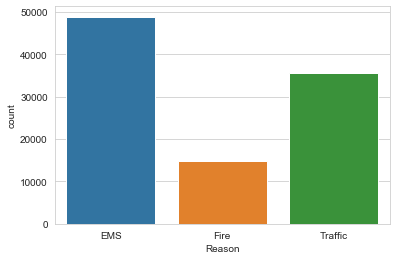

In [19]:
sns.countplot(x='Reason', data =df)

Now let us begin to focus on time information

In [22]:
type(df['timeStamp'].iloc[0])

str

Time Stamp is showing as string let us convert this timeStamp value into DateTime Objects.

In [23]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Now let us create new columns such as 'Hour', 'Month', 'Day of Week' using lambda 

In [25]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

Here interesting stuff is, how Days of Week is an integer 0-6. we will use .map()with this dictionary to map the actual string names to the day of the week.


In [26]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [27]:
df['Day of Week'] = df['Day of Week'].map(dmap)

Now we will create the seaborn counplot of the Day of Week column

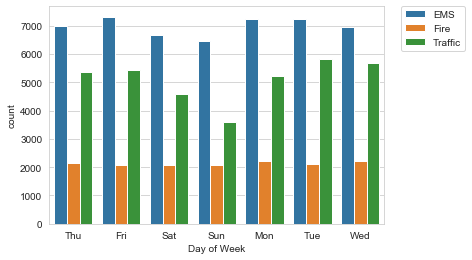

In [29]:
sns.countplot(x='Day of Week', data = df,hue='Reason')
 # We need to relocate the legend as it is coming on the graph
plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad=0.)

Now we will do same for Months

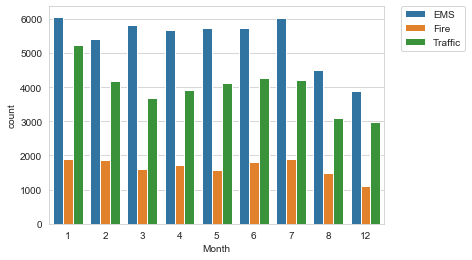

In [31]:
sns.countplot(x='Month', data = df, hue = 'Reason')
# Relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Month 9,10,11 are missing in above plot, let we create a simple line plot that fills in missing months

We need to create a groupby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation. we will use head() method on this returned DataFrame.

In [32]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Now create a simple plot off the data frame which will indicate the count of the calls per month, we can use any column name 

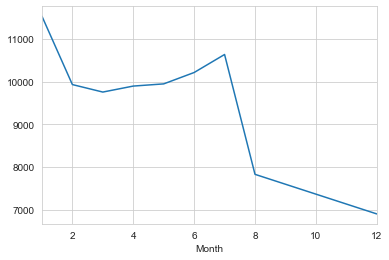

In [48]:
byMonth['zip'].plot()

Now use seaborn's lmplot() to create a linear fit on the number of calls per month.

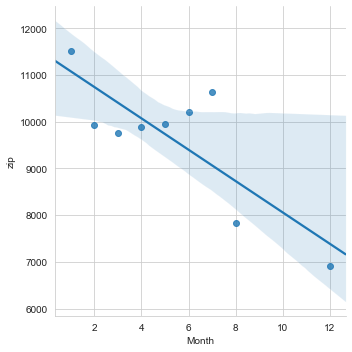

In [49]:
sns.lmplot(x='Month', y ='zip',data = byMonth.reset_index())

Create a new column called 'Date' that contains the date from the timeStamp column

In [46]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

Now we will groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

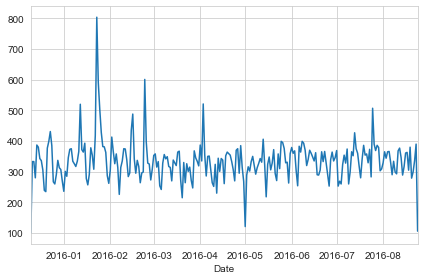

In [50]:
df.groupby('Date').count()['zip'].plot()
plt.tight_layout()

Now create 3 separate plots from this plot with each plot representing a Reason for the 911 call

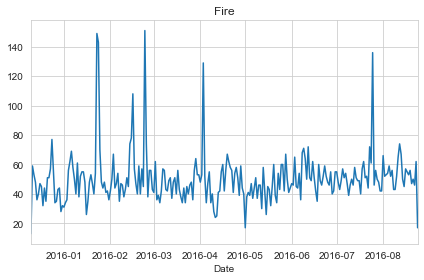

In [51]:
df[df['Reason']=='Fire'].groupby('Date').count()['zip'].plot()
plt.title('Fire')
plt.tight_layout()

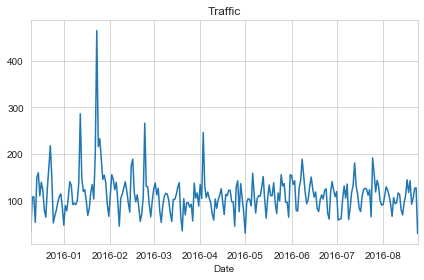

In [52]:
df[df['Reason']=='Traffic'].groupby('Date').count()['zip'].plot()
plt.title('Traffic')
plt.tight_layout()

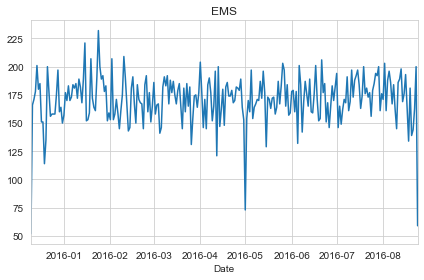

In [53]:
df[df['Reason']=='EMS'].groupby('Date').count()['zip'].plot()
plt.title('EMS')
plt.tight_layout()

Now let us creat heatmaps with seaborn and our data. We will restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 

In [54]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


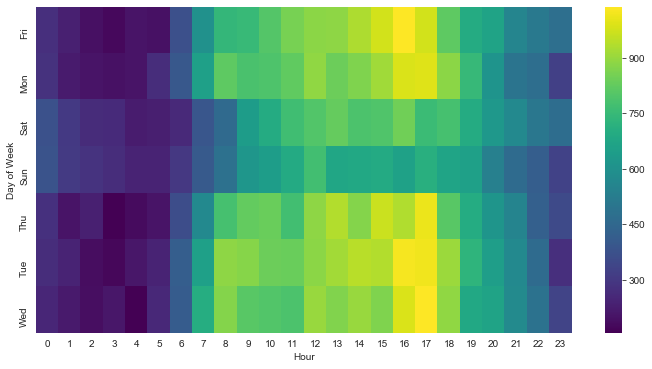

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

Now create a clustermap using this DataFrame.

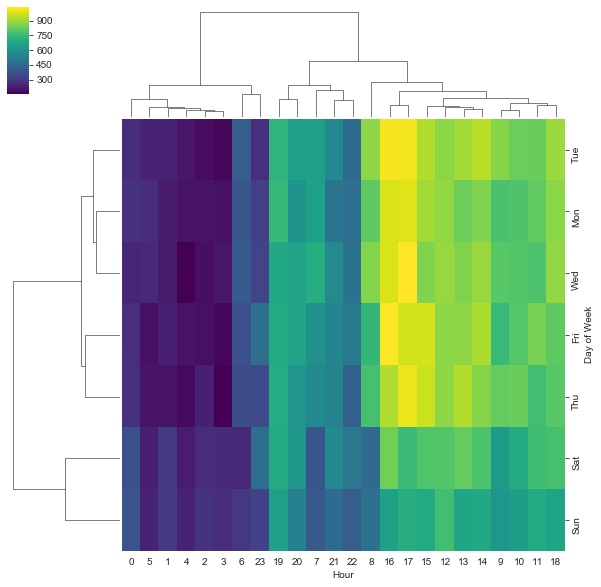

In [57]:
sns.clustermap(dayHour,cmap='viridis')

Now repeat these same plots for a DataFrame that shows the Month as the column.

In [58]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


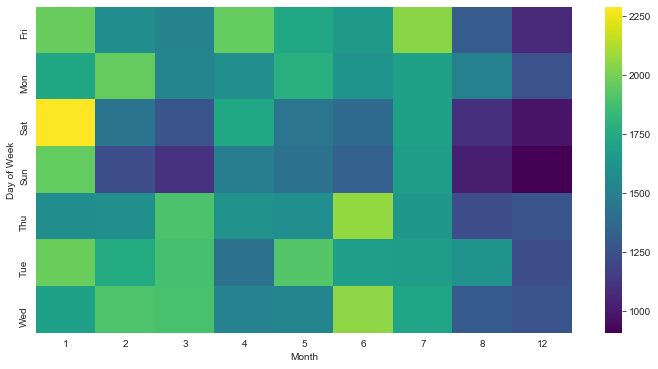

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

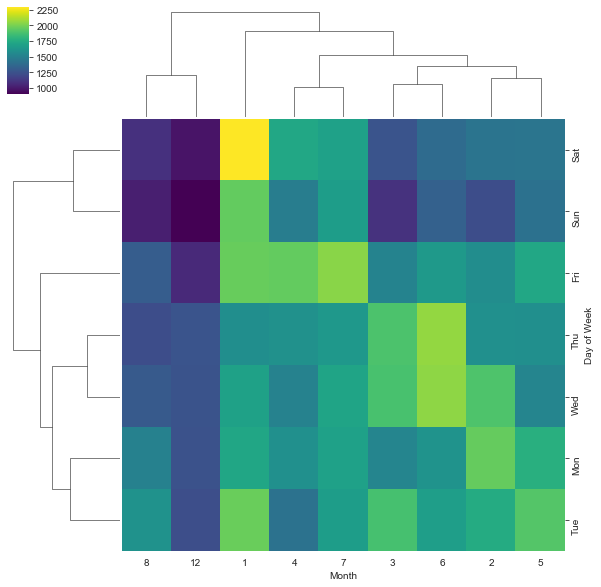

In [60]:
sns.clustermap(dayMonth,cmap='viridis')